In [23]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
os.chdir("C:\\Users\\harini\\Desktop\\excel practice")

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
df 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
#we will not require the first 2 attributes as the are specific to a customer. 
#It is borderline with the surname as this would result to profiling so we exclude this as well.

In [21]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df["Geography"]

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

HOW MANY PEOPLE BELONG TO PARTICULAR COUNTRY - USING FREQUENCY TABLE 

In [42]:
pd.crosstab(index = df["Geography"],columns = "total",dropna = True)

col_0,total
Geography,
France,5014
Germany,2509
Spain,2477


HOW MANY MALE AND FEMALE ARE THERE IN THE DATA

In [41]:
pd.crosstab(index = df["Gender"],columns = "total"  ,dropna = True)

col_0,total
Gender,
Female,4543
Male,5457


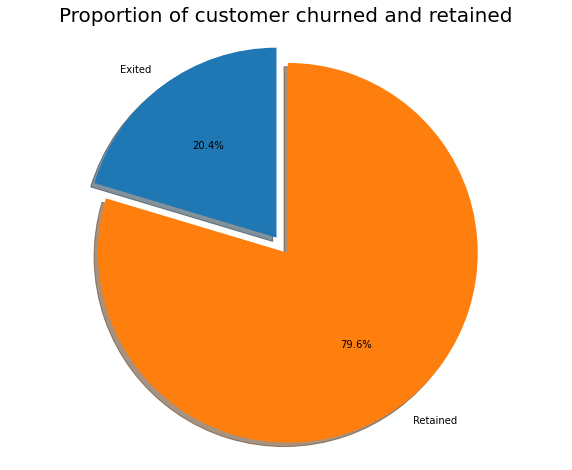

In [24]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# COUNTPLOT USING SEABORN LIBRARY


<AxesSubplot:xlabel='Geography', ylabel='count'>

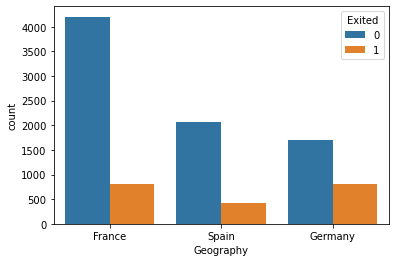

In [25]:
sns.countplot(x = "Geography",data = df , hue = "Exited")

<AxesSubplot:xlabel='Gender', ylabel='count'>

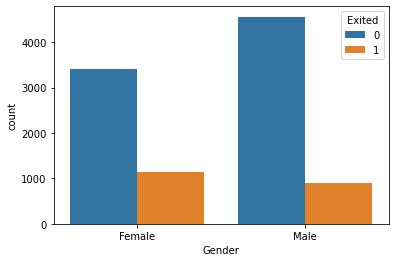

In [27]:
sns.countplot(x = "Gender",data = df , hue = "Exited")

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

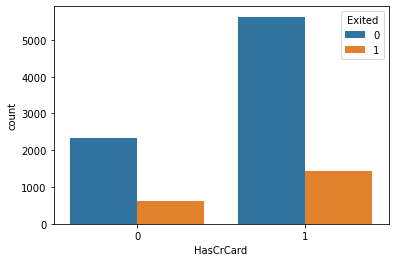

In [28]:
sns.countplot(x = "HasCrCard",data = df , hue = "Exited")

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

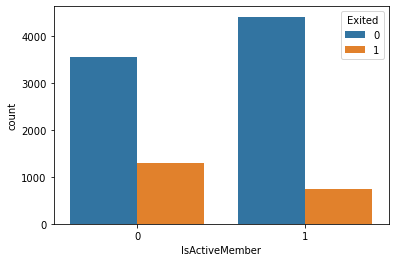

In [29]:
sns.countplot(x = "IsActiveMember" , data = df , hue = "Exited")

INFERENCE 

Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related 
to the population of customers imply that the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
The proportion of female customers churning is also greater than that of male customers

Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers 
have credit cards could prove this to be just a coincidence.

Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers 
is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will 
definately have a positive impact on the customer churn.

# BOXPLOT USING SEABORN 

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

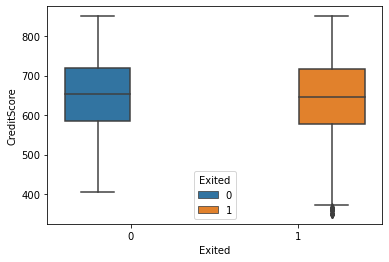

In [32]:
sns.boxplot(y = "CreditScore",x = "Exited",hue = "Exited",data = df )

<AxesSubplot:xlabel='Exited', ylabel='Age'>

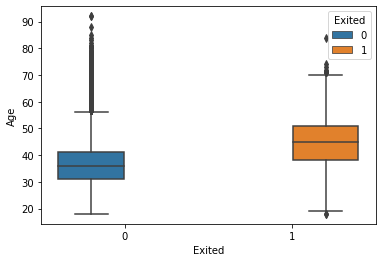

In [33]:
sns.boxplot(y = "Age",x = "Exited",hue = "Exited",data = df )

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

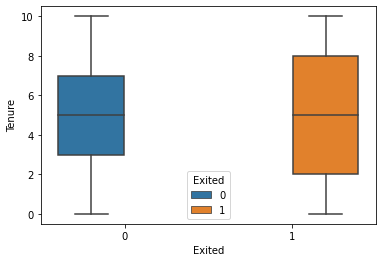

In [34]:
sns.boxplot(y = "Tenure",x = "Exited",hue = "Exited",data = df )

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

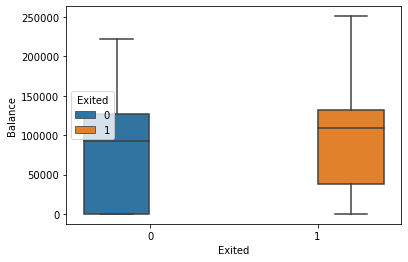

In [35]:
sns.boxplot(y = "Balance",x = "Exited",hue = "Exited",data = df )

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

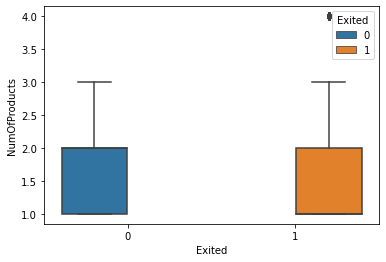

In [39]:
sns.boxplot(y = "NumOfProducts",x = "Exited",hue = "Exited",data = df )

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

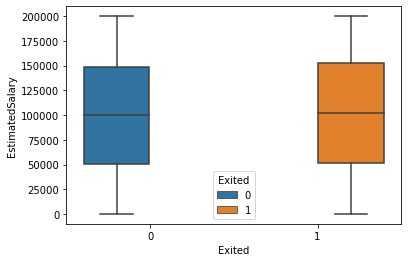

In [38]:
sns.boxplot(y = "EstimatedSalary",x = "Exited",hue = "Exited",data = df )

There is no significant difference in the credit score distribution between retained and churned customers.
The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
Neither the products nor salary has a no significant effect on the likelihood to churn.